# #Import library

In [1]:
import pandas as pd
import librosa
import numpy as np
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_list = []
c_path = []
label_list = []

path = 'dataset'

for i in os.listdir(path):
    
    print(i)
    path1 = os.path.join(path, i)

    for j in os.listdir(path1):
        
        path2 = os.path.join(path1, j)
        c_path.append(path2)
        file_list.append(j)
        label_list.append(i)
        print(f"{j} label {i}")


0
Recording_10.wav label 0
Recording_11.wav label 0
Recording_12.wav label 0
Recording_13.wav label 0
Recording_14.wav label 0
Recording_15.wav label 0
Recording_16.wav label 0
Recording_17.wav label 0
Recording_18.wav label 0
Recording_19.wav label 0
Recording_21.wav label 0
Recording_22.wav label 0
Recording_23.wav label 0
Recording_24.wav label 0
Recording_25.wav label 0
Recording_26.wav label 0
Recording_27.wav label 0
Recording_28.wav label 0
Recording_29.wav label 0
Recording_3.wav label 0
Recording_30.wav label 0
Recording_4.wav label 0
Recording_5.wav label 0
Recording_6.wav label 0
Recording_7.wav label 0
Recording_8.wav label 0
Recording_9.wav label 0
sample11.wav label 0
sample22.wav label 0
sample33.wav label 0
sample44.wav label 0
sample55.wav label 0
sample66.wav label 0
sample77.wav label 0
sample88.wav label 0
1
1.mp3 label 1
1Converted by VirtualSpeech - 2ynzrqpg0i.mp3 label 1
6.mp3 label 1
82.mp3 label 1
9.mp3 label 1
Conve2rted by VirtualSpeech - 3b8zdr0khe.mp3 label

In [3]:
dframe = pd.DataFrame({
    'File': c_path,
    'Label': label_list
})

dframe.head(40)

,File,Label
0,dataset\0\Recording_10.wav,0
1,dataset\0\Recording_11.wav,0
2,dataset\0\Recording_12.wav,0
3,dataset\0\Recording_13.wav,0
4,dataset\0\Recording_14.wav,0
5,dataset\0\Recording_15.wav,0
6,dataset\0\Recording_16.wav,0
7,dataset\0\Recording_17.wav,0
8,dataset\0\Recording_18.wav,0
9,dataset\0\Recording_19.wav,0


# #EDA

In [4]:
dframe.shape

(79, 2)

In [5]:
dframe['Label'].value_counts()

1    44
0    35
Name: Label, dtype: int64

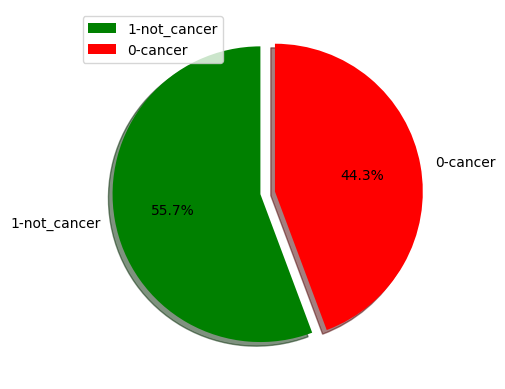

In [6]:
explode = (0, 0.1)
plt.pie(dframe['Label'].value_counts(), autopct='%1.1f%%', labels=["1-not_cancer","0-cancer"], colors=['g','r'], shadow=True, startangle=90, explode=explode)
plt.legend()
plt.show() 

In [7]:
filename=dframe['File'][29]
print(filename)
frequency = librosa.get_samplerate(filename)

print("Frequency of the audio file:", frequency, "Hz")

dataset\0\sample33.wav
Frequency of the audio file: 16000 Hz


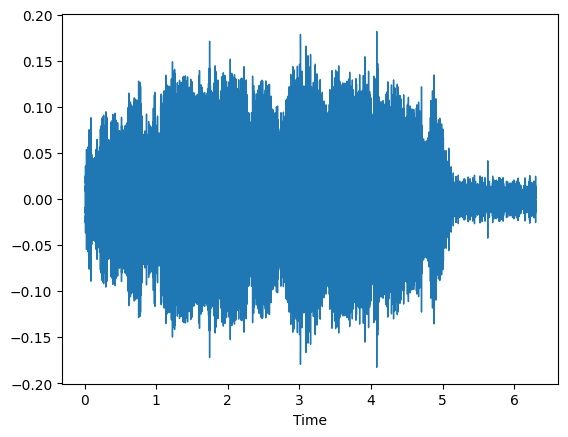

In [8]:
y, sr = librosa.load(filename)
librosa.display.waveshow(y,sr=sr,)

In [9]:
import IPython.display as ipd
plt.figure(figsize=(14,5))
ipd.Audio(filename)

<Figure size 1400x500 with 0 Axes>

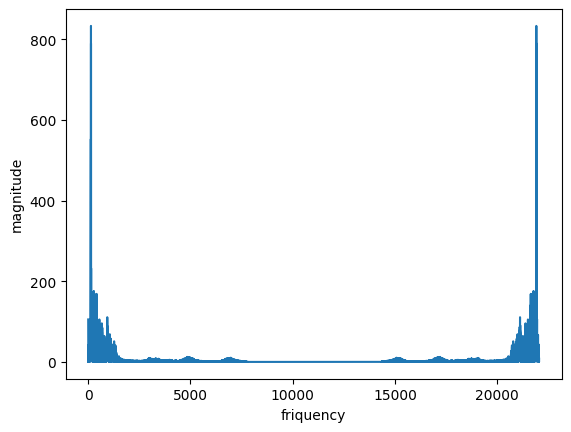

In [10]:
# Fast Fourier Transform (FFT) ->spactrum
fft=np.fft.fft(y)
magnitude=np.abs(fft)
friquency=np.linspace(0,sr,len(magnitude))
plt.plot(friquency,magnitude)
plt.xlabel("friquency")
plt.ylabel("magnitude")
plt.show()

In [11]:
# Extract features
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)      #Short-Time Fourier Transform
rmse = librosa.feature.rms(y=y)                            #Root Mean Square Error
spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)  #Spectral Centroid
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)   #Spectral Bandwidth
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)     #Rolloff
mfcc = librosa.feature.mfcc(y=y, sr=sr)                    #Mel-Frequency Cepstral Coefficients
print("#chroma_stft")
print(chroma_stft)
print('------------------------------------------------------')
print("#rmse")
print(rmse)
print('------------------------------------------------------')
print("#spec_cent")
print(spec_cent)
print('------------------------------------------------------')
print("#spec_bw")
print(spec_bw)
print('------------------------------------------------------')
print("#rolloff")
print(rolloff)
print('------------------------------------------------------')
print("#mfcc")
print(mfcc)

#chroma_stft
[[0.5392061  0.51083076 0.8586391  ... 0.652453   0.7883429  0.7445797 ]
 [0.8275163  0.9362668  1.         ... 0.77849513 0.8912502  0.9809217 ]
 [1.         0.8977699  0.5861545  ... 0.83224404 0.77422756 1.        ]
 ...
 [0.9100793  1.         0.41624466 ... 0.74413276 0.687019   0.74033046]
 [0.8594803  0.7161388  0.44075844 ... 0.776083   0.49385455 0.5925944 ]
 [0.6158713  0.44205832 0.57982546 ... 0.8815105  0.5673799  0.5502137 ]]
------------------------------------------------------
#rmse
[[0.0109741  0.01540438 0.01924824 0.01962915 0.01985264 0.01865597
  0.01860249 0.01982089 0.02331273 0.02755936 0.03129469 0.0343999
  0.03388849 0.03150307 0.03046463 0.03004941 0.03167363 0.03386686
  0.03360397 0.03360267 0.03458585 0.03456502 0.03498083 0.03506882
  0.03544752 0.03815041 0.04066594 0.04245732 0.04343575 0.04392175
  0.0443278  0.04590749 0.04588153 0.04242839 0.03797426 0.03319612
  0.02890566 0.02953225 0.03075695 0.03072632 0.03395088 0.03571107
  0.036

In [12]:
scale_mfcc_feature=np.mean(mfcc.T, axis=0) #Mel-frequency cepstral coefficients (MFCCs)
print(scale_mfcc_feature)

[-293.64       153.95918    -19.15489     33.902237   -48.030228
   37.099243     3.5290222   21.209614   -14.555323     8.537434
    2.6401803   -0.4009838    2.2569013   -5.5727468    0.3162659
  -15.706277    17.19504    -21.437742     7.5732837   -5.301098 ]


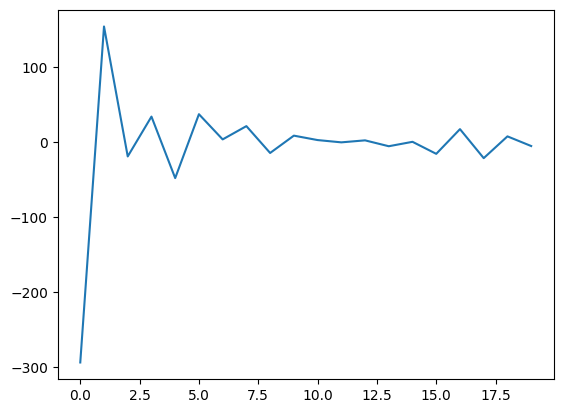

In [13]:
plt.plot(scale_mfcc_feature)
plt.show()

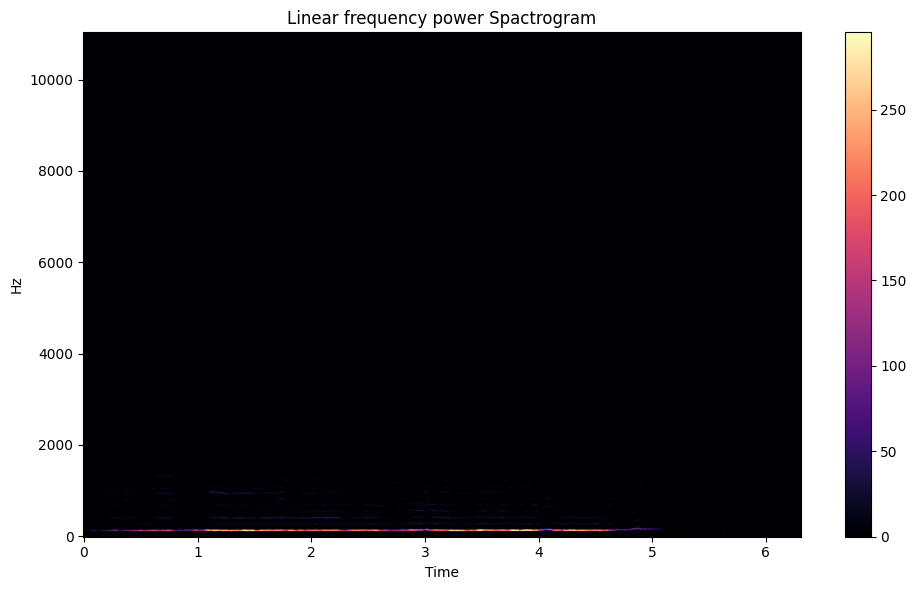

In [14]:
stft=np.abs(librosa.stft(y,n_fft=1024,hop_length=320,win_length=1024,window='hann'))**2
plt.figure(figsize=(10, 6))
librosa.display.specshow(stft, sr=sr, hop_length=320, x_axis='time', y_axis='linear')
plt.title('Linear frequency power Spactrogram')
plt.colorbar()
plt.tight_layout()
plt.show()

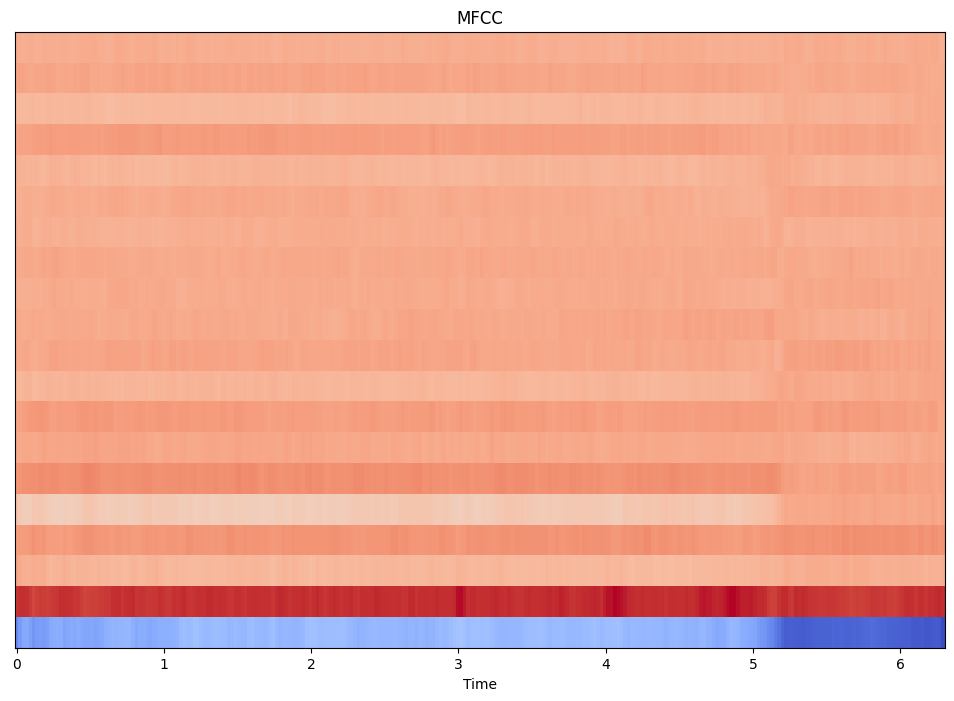

In [15]:
plt.figure(figsize=(12, 8))
librosa.display.specshow(mfcc,sr=sr, x_axis='time')
plt.title('MFCC')
plt.show()

# #Feature extraction Mel-Frequency Cepstral Coefficients (MFCCs) technique

In [16]:
def extract_feature(file_path):
    y, sr = librosa.load(file_path)
    mfcc = librosa.feature.mfcc(y=y, sr=sr) 
    scale_mfcc_feature=np.mean(mfcc.T, axis=0)
    return scale_mfcc_feature
    
    

In [17]:
dframe['feature']=dframe['File'].apply(lambda x: extract_feature(x))

In [18]:
dframe.head(30)

,File,Label,feature
0,dataset\0\Recording_10.wav,0,"[-270.0172, 134.40236, -77.47637, 16.625116, -..."
1,dataset\0\Recording_11.wav,0,"[-455.37814, 101.37349, -35.443027, 26.080696,..."
2,dataset\0\Recording_12.wav,0,"[-491.06747, 106.82572, -15.506285, 23.465267,..."
3,dataset\0\Recording_13.wav,0,"[-258.71033, 102.779015, -66.90222, 18.631023,..."
4,dataset\0\Recording_14.wav,0,"[-246.59666, 115.35757, -89.93782, 27.505424, ..."
5,dataset\0\Recording_15.wav,0,"[-239.29611, 109.97438, -84.40085, 21.219254, ..."
6,dataset\0\Recording_16.wav,0,"[-242.03409, 107.98829, -78.4364, 20.193634, -..."
7,dataset\0\Recording_17.wav,0,"[-206.15541, 105.21654, -83.35742, 19.755985, ..."
8,dataset\0\Recording_18.wav,0,"[-252.30148, 106.05245, -74.346794, 10.974395,..."
9,dataset\0\Recording_19.wav,0,"[-251.71124, 112.899155, -62.893356, 17.89141,..."


# #Build_Model

In [19]:
x=np.array(dframe['feature'].tolist())

In [20]:
print(x.shape)

(79, 20)


In [21]:
print(x)

[[-2.7001721e+02  1.3440236e+02 -7.7476372e+01 ... -1.0509714e+00
   1.1695850e+01  1.6603971e+00]
 [-4.5537814e+02  1.0137349e+02 -3.5443027e+01 ... -8.0121107e+00
   5.5733209e+00 -4.9197856e-01]
 [-4.9106747e+02  1.0682572e+02 -1.5506285e+01 ... -5.5329447e+00
   2.0433555e+00  4.4422776e-01]
 ...
 [-3.1560709e+02  1.4514330e+02 -6.7938057e+01 ... -2.6621177e+00
  -3.9215076e+00 -7.3237185e+00]
 [-3.5205423e+02  1.7016624e+02 -1.9369770e+01 ... -3.9487231e+00
  -6.7520480e+00 -1.4875442e+01]
 [-3.1311780e+02  1.5633598e+02 -1.7328516e+01 ... -2.0302881e+01
   1.3456264e+01 -1.6534954e+01]]


In [22]:
y=np.array(dframe['Label'].astype(int))

In [23]:
print(y.shape)

(79,)


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# #LogisticRegression-----------------------------------------------

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report

lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
# Print the weights of the model
print("Model Coefficients (Weights):", lr.coef_)  # For linear models, coefficients are the weights
print("Model Intercept (Bias):", lr.intercept_)   # For linear models, intercept is the bias

Model Coefficients (Weights): [[-0.01028031 -0.02659794  0.05251109  0.09864774 -0.00827178 -0.05481724
   0.09005387 -0.04960679  0.06757885 -0.22084488 -0.12800903 -0.16425773
   0.13729395 -0.00599115 -0.24466836  0.04346916 -0.18322721 -0.05082968
  -0.06546321 -0.18640505]]
Model Intercept (Bias): [-0.00203271]


In [27]:
predict=lr.predict(x_test)

round(accuracy_score(y_test,predict),3)

0.938

In [28]:
confusion_matrix(y_test,predict)

array([[ 3,  1],
       [ 0, 12]], dtype=int64)

In [29]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.92      1.00      0.96        12

    accuracy                           0.94        16
   macro avg       0.96      0.88      0.91        16
weighted avg       0.94      0.94      0.93        16



In [30]:
import pickle
pickle.dump(lr,open('model.pkl','wb'))

# #training and testing error of classification model

In [31]:
y_train_pred=lr.predict(x_train)
training_error=accuracy_score(y_train, y_train_pred)
print("training error :",1-training_error)
y_test_pred=lr.predict(x_test)
testing_error=accuracy_score(y_test, y_test_pred)
print("testing error :",1-testing_error)

training error : 0.0
testing error : 0.0625


# Prediction on new dataset

In [32]:
def extract_feature1(file_path):
    y, sr = librosa.load(file_path)
    mfcc = librosa.feature.mfcc(y=y, sr=sr) 
    scale_mfcc_feature=np.mean(mfcc.T, axis=0)
    
    scale_mfcc_feature = np.array(scale_mfcc_feature.tolist())
    scale_mfcc_feature = scale_mfcc_feature.reshape(1, -1)
    
    return scale_mfcc_feature
    

In [33]:
val_path = dframe['File'][1]
print(val_path)

validate = extract_feature1(val_path)
val_y = lr.predict(validate)
print(val_y[0])
pr_probility=lr.predict_proba(validate)
print(f"with probability : {pr_probility}")

dataset\0\Recording_11.wav
0
with probability : [[0.99621237 0.00378763]]


In [34]:
# import pickle
# pickle.dump(cs,open('model.pkl','wb'))

# #threshold manipulation(Find Optimal Threshold For Classification)

In [35]:
pr_prob=lr.predict_proba(x_test)[:,1]
print(pr_prob)

[0.99543931 0.01181836 0.93565623 0.99908815 0.99993668 0.99996668
 0.99988993 0.99890269 0.999647   0.99996099 0.99969255 0.99960359
 0.07385573 0.99999994 0.99987058 0.0172395 ]


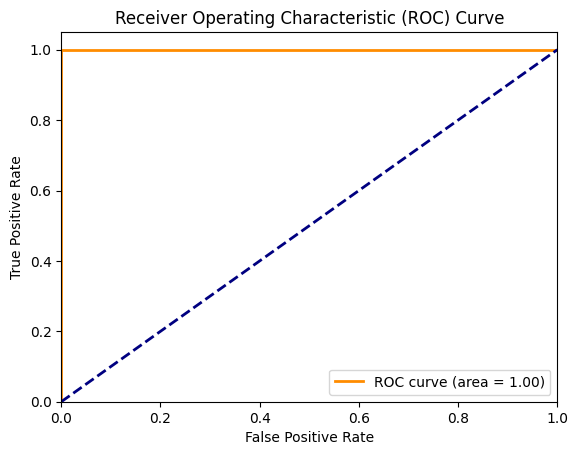

In [36]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, pr_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC-AUC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [37]:
optimal_index=np.argmax(tpr-fpr)
optimal_threshold=thresholds[optimal_index]
print("optimal threshold is",round(optimal_threshold,4))

optimal threshold is 0.9954


In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold_validation = KFold(n_splits=5)
scores_lr = cross_val_score(lr, x, y, cv=kfold_validation)

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [39]:
print(scores_lr)
print(round(scores_lr.mean(),3))

[1.         1.         1.         1.         0.46666667]
0.893


# #support vector machine (SVM)------------------------------------

In [40]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1, random_state=32)
clf.fit(x_train,y_train)

SVC(C=1, kernel='linear', random_state=32)

In [41]:
pred=clf.predict(x_test)
round(accuracy_score(y_test,pred),3)

0.938

In [42]:
confusion_matrix(y_test,pred)

array([[ 3,  1],
       [ 0, 12]], dtype=int64)

In [43]:
# import pickle
# pickle.dump(clf,open('model.pkl','wb'))

# #training and testing error of classification model

In [44]:
y_train_pred=clf.predict(x_train)
training_error=accuracy_score(y_train, y_train_pred)
print(1-training_error)
y_test_pred=clf.predict(x_test)
testing_error=accuracy_score(y_test, y_test_pred)
print(1-testing_error)

0.0
0.0625


# #check model overfitting using Cross validation

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold_validation = KFold(n_splits=5)
scores_svm = cross_val_score(clf, x, y, cv=kfold_validation)

In [46]:
print(scores_svm)
print(round(scores_svm.mean(),3))

[1.         1.         1.         1.         0.33333333]
0.867


# #Decision_Tree-----------------------------------------------

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [48]:
predict=dtc.predict(x_test)

round(accuracy_score(y_test,predict),3)

1.0

In [49]:
confusion_matrix(y_test,predict)

array([[ 4,  0],
       [ 0, 12]], dtype=int64)

In [50]:
scores_dtc = cross_val_score(dtc, x, y, cv=7)
print(scores_dtc)
print(round(scores_dtc.mean(),3))

[1.         1.         1.         0.81818182 1.         0.63636364
 0.54545455]
0.857


In [51]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        12

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



# #training and testing error of classification model

In [52]:
y_train_pred=dtc.predict(x_train)
training_error=accuracy_score(y_train, y_train_pred)
print(1-training_error)
y_test_pred=dtc.predict(x_test)
testing_error=accuracy_score(y_test, y_test_pred)
print(1-testing_error)

0.0
0.0


In [53]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(x_train,y_train)
predict=reg.predict(x_test)

In [54]:
print(predict.mean())

0.80874205


[1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.]


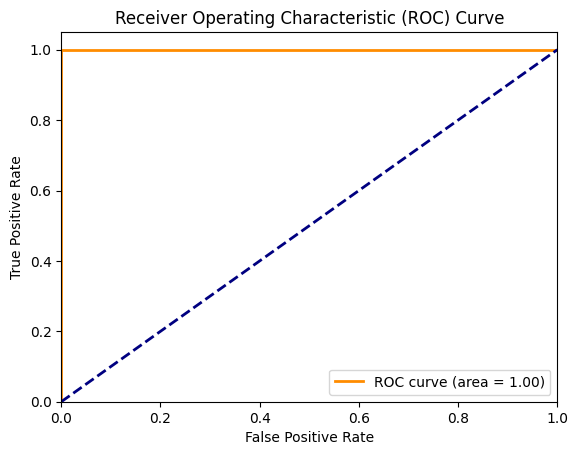

optimal threshold is 1.0


In [55]:
pr_prob=dtc.predict_proba(x_test)[:,1]
print(pr_prob)

fpr, tpr, thresholds = roc_curve(y_test, pr_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC-AUC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

optimal_index=np.argmax(tpr-fpr)
optimal_threshold=thresholds[optimal_index]
print("optimal threshold is",round(optimal_threshold,4))

In [56]:
# import pickle
# pickle.dump(dtc,open('model.pkl','wb'))

# #Ensemble Methods (GradientBoostingClassifier)-------------

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(x_train, y_train)
predict=clf.predict(x_test)
clf.score(x_test, y_test)

0.875

In [58]:
confusion_matrix(y_test,pred)

array([[ 3,  1],
       [ 0, 12]], dtype=int64)

In [59]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.86      1.00      0.92        12

    accuracy                           0.88        16
   macro avg       0.93      0.75      0.79        16
weighted avg       0.89      0.88      0.86        16



# #training and testing error of classification model

In [60]:
y_train_pred=clf.predict(x_train)
training_error=accuracy_score(y_train, y_train_pred)
print(1-training_error)
y_test_pred=clf.predict(x_test)
testing_error=accuracy_score(y_test, y_test_pred)
print(1-testing_error)

0.0
0.125


In [61]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

# Define the hyperparameter grid
parameters = {
    'n_estimators': [30, 40, 50, 75, 80, 90, 100],
    'learning_rate': [0.1, 0.3, 0.4, 0.5, 0.7, 0.9, 1],
    'max_depth': [1, 2, 3, 4, 5, 6, 8],
    'random_state': [0, 2, 10, 40, 5, 6, 8]
}

# #Hyperparameter Tuning

In [62]:
# from sklearn.model_selection import GridSearchCV
# gcv = GridSearchCV(clf, parameters, cv=5)
# search=gcv.fit(x_train, y_train)
# print(search.best_params_)
# print(search.best_score_)

In [63]:
from sklearn.model_selection import RandomizedSearchCV
clf_cv = RandomizedSearchCV(clf, parameters,cv=5)
search = clf_cv.fit(x_train,y_train)
print(search.best_params_)
print(search.best_score_)

{'random_state': 5, 'n_estimators': 30, 'max_depth': 2, 'learning_rate': 0.5}
0.8923076923076924


In [64]:
scores_gbc = cross_val_score(clf, x, y, cv=kfold_validation)
print(scores_gbc)
print(round(scores_gbc.mean(),3))

[0.75 1.   1.   1.   0.4 ]
0.83


# #Ensemble Methods (XGBClassifier)-----------------------

In [65]:
from xgboost import XGBClassifier
y_train = y_train.astype(int)
model = XGBClassifier()
# Training the model
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [66]:
# Making predictions
y_pred = model.predict(x_test)
y_test=y_test.astype(int)
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))

Accuracy: 87.50%
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.86      1.00      0.92        12

    accuracy                           0.88        16
   macro avg       0.93      0.75      0.79        16
weighted avg       0.89      0.88      0.86        16



In [67]:
scores_xgb = cross_val_score(model, x, y.astype(int), cv=kfold_validation)
print(scores_xgb)
print(round(scores_xgb.mean(),3))

[1.     0.8125 1.     1.     0.4   ]
0.842


[0.9857475  0.14191067 0.7199718  0.9857475  0.9876407  0.8886898
 0.88862884 0.94102    0.9803641  0.9857475  0.9803641  0.98296
 0.02704767 0.9018273  0.9876407  0.64794   ]


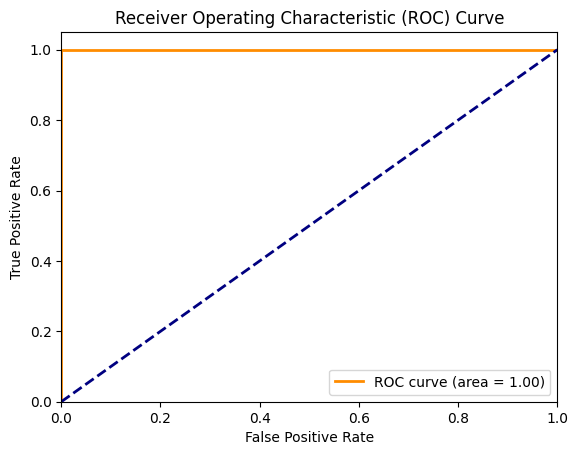

optimal threshold is 0.8886


In [68]:
pr_prob=model.predict_proba(x_test)[:,1]
print(pr_prob)

fpr, tpr, thresholds = roc_curve(y_test, pr_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC-AUC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

optimal_index=np.argmax(tpr-fpr)
optimal_threshold=thresholds[optimal_index]
print("optimal threshold is",round(optimal_threshold,4))

In [69]:
# import pickle
# pickle.dump(model,open('model.pkl','wb'))

# #training and testing error of classification model

In [70]:
y_train_pred=model.predict(x_train)
training_error=accuracy_score(y_train, y_train_pred)
print(1-training_error)
y_test_pred=model.predict(x_test)
testing_error=accuracy_score(y_test, y_test_pred)
print(1-testing_error)


0.0
0.125


# #Hyperparameter Tuning

In [71]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, f1_score

# model = XGBClassifier(random_state=42)

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'gamma': [0, 0.1, 0.2],
#     'reg_alpha': [0, 0.1, 0.5],
#     'reg_lambda': [1, 1.5, 2]
# }

# param_dist = {
#     'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
#     'max_depth': [int(x) for x in np.linspace(3, 10, num=8)],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'gamma': [0, 0.1, 0.2, 0.3, 0.4],
#     'reg_alpha': [0, 0.1, 0.5, 1],
#     'reg_lambda': [0.5, 1, 1.5, 2]
# }

# # grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
#                            scoring='accuracy', cv=3, verbose=2, n_jobs=-1)
# grid_search.fit(x_train, y_train)

# print(f"Best parameters found: {grid_search.best_params_}")
# print(f"Best training accuracy: {grid_search.best_score_}")


In [72]:
# # random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
#                                    n_iter=100, scoring='accuracy', cv=3, 
#                                    verbose=2, random_state=42, n_jobs=-1)
# random_search.fit(x_train, y_train)

# print(f"Best parameters found: {random_search.best_params_}")
# print(f"Best training accuracy: {random_search.best_score_}")



In [73]:
# # Use the best model found from the search
# best_model = random_search.best_estimator_

# # Predict on the test set
# y_test_pred = best_model.predict(x_test)

# # Calculate and print metrics
# accuracy = accuracy_score(y_test, y_test_pred)
# f1 = f1_score(y_test, y_test_pred, average='weighted')

# print(f"Test Accuracy: {accuracy:.4f}")
# print(f"Test F1-Score: {f1:.4f}")


# #Ensemble Methods (RandomForestClassifier)--------------------

In [74]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20, random_state=40)

In [75]:
model.fit(x_train, y_train)

# Making predictions
y_pred = model.predict(x_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Displaying classification report
print(classification_report(y_test, y_pred))

Accuracy: 87.50%
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.86      1.00      0.92        12

    accuracy                           0.88        16
   macro avg       0.93      0.75      0.79        16
weighted avg       0.89      0.88      0.86        16



In [76]:
scores_rfc = cross_val_score(model, x, y, cv=kfold_validation)
print(scores_rfc)
print(round(scores_rfc.mean(),3))

[0.9375     0.9375     1.         1.         0.33333333]
0.842


[1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.]


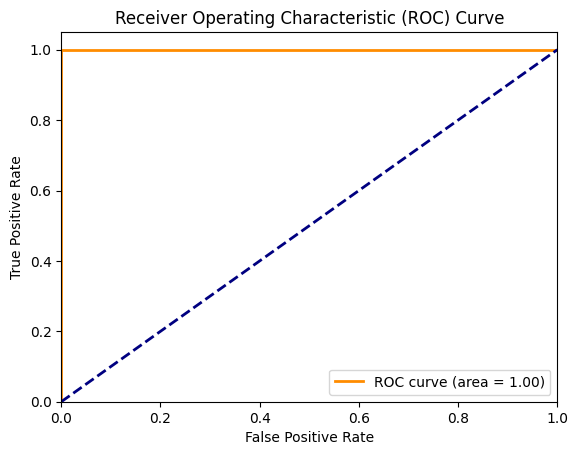

optimal threshold is 1.0


In [77]:
pr_prob=dtc.predict_proba(x_test)[:,1]
print(pr_prob)

fpr, tpr, thresholds = roc_curve(y_test, pr_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC-AUC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

optimal_index=np.argmax(tpr-fpr)
optimal_threshold=thresholds[optimal_index]
print("optimal threshold is",round(optimal_threshold,4))

In [78]:
# import pickle
# pickle.dump(model,open('model.pkl','wb'))

# #training and testing error of classification model

In [79]:
y_train_pred=model.predict(x_train)
training_error=accuracy_score(y_train, y_train_pred)
print(1-training_error)
y_test_pred=model.predict(x_test)
testing_error=accuracy_score(y_test, y_test_pred)
print(1-testing_error)


0.0
0.125


# #Hyperparameter Tuning

In [80]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, f1_score
# model = RandomForestClassifier(random_state=42)
# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [10, 20, 30, 40, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'bootstrap': [True, False]
# }
# param_dist = {
#     'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
#     'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'bootstrap': [True, False]
# }
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
#                            scoring='accuracy', cv=3, verbose=2, n_jobs=-1)
# grid_search.fit(x_train, y_train)

# print(f"Best parameters found: {grid_search.best_params_}")
# print(f"Best training accuracy: {grid_search.best_score_}")


In [81]:
# random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
#                                    n_iter=100, scoring='accuracy', cv=3, 
#                                    verbose=2, random_state=42, n_jobs=-1)
# random_search.fit(x_train, y_train)

# print(f"Best parameters found: {random_search.best_params_}")
# print(f"Best training accuracy: {random_search.best_score_}")


In [82]:
# # Use the best model found from the search
# best_model = random_search.best_estimator_  # or grid_search.best_estimator_

# # Predict on the test set
# y_test_pred = best_model.predict(x_test)

# # Calculate and print metrics
# accuracy = accuracy_score(y_test, y_test_pred)
# f1 = f1_score(y_test, y_test_pred, average='weighted')

# print(f"Test Accuracy: {accuracy:.4f}")
# print(f"Test F1-Score: {f1:.4f}")


# #L1 and L2 Regularization

In [83]:
from sklearn.linear_model import Lasso, Ridge
# lasso = Lasso(alpha=50, max_iter=100, tol=0.1)
# lasso.fit(x_train, y_train)
# score = lasso.score(x_test, y_test)
# print(score)

In [84]:
gri=Ridge(alpha=50, max_iter=100, tol=0.1)
gri.fit(x_train,y_train)
gri.score(x_test,y_test)


0.7496676100039059

In [85]:
# Create a Logistic Regression model with L1 (Lasso) regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
model_l1.fit(x_train, y_train)
model_l1.score(x_test,y_test)

1.0

In [86]:
# Create a Logistic Regression model with L2 (Ridge) regularization
model_l2 = LogisticRegression(penalty='l2', solver='lbfgs')
model_l2.fit(x_train, y_train)
model_l2.score(x_test,y_test)

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9375

# #compare multiple ROC curves for different models on the same plot

In [87]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


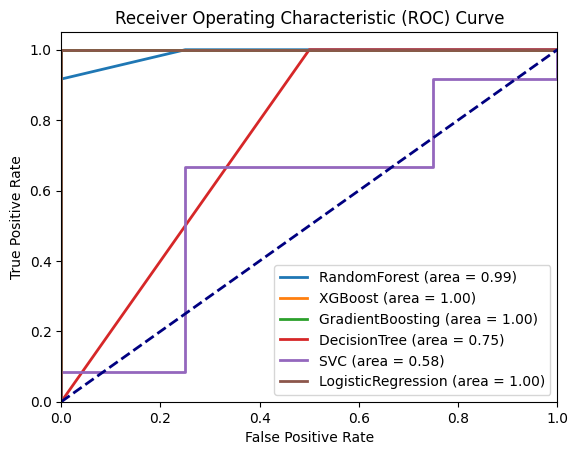

In [88]:
classifiers = {
    'RandomForest': RandomForestClassifier(n_estimators=20, random_state=40),
    'XGBoost': XGBClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'SVC': SVC(probability=True, random_state=42),
    'LogisticRegression': LogisticRegression()
}

# Plotting the ROC curves
plt.figure()

for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(x_train, y_train)
    
    # Predict probabilities for the test set
    y_probs = clf.predict_proba(x_test)[:, 1]  # Probability estimates for the positive class
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    # Find the optimal threshold
#     optimal_threshold = None
#     for i in range(len(tpr)):
#         if fpr[i] > tpr[i]:
#             optimal_threshold = thresholds[i]
#             break

#     if optimal_threshold is not None:
#         print(f"Optimal threshold for {name}: {optimal_threshold}")
#     else:
#         print(f"No optimal threshold found for {name}")


    
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (area = {roc_auc:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# #train with more feature

In [89]:
# y, sr = librosa.load(dframe['File'][0])
# chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)      
# rmse = librosa.feature.rms(y=y)                            
# spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
# spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)   
# rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)     
# mfcc = librosa.feature.mfcc(y=y, sr=sr) 
# scale_mfcc_feature=np.mean(mfcc.T, axis=0)
# Performance Metrics On MultiClass Classification Problems